## Week 8
### Hypertuning of ANNs


In [1]:
# Cell 1 Import statements for 

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

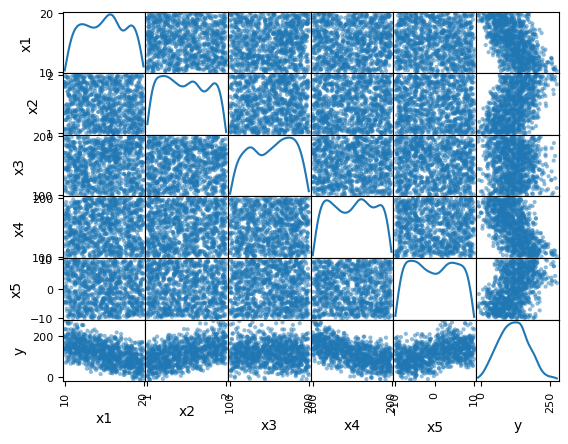

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   y       1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [2]:
# Cell 2 Read Dataset and investigate

df = pd.read_excel('dataset1.xlsx')

# Create a scatter matrix plot
scatter_matrix(df, diagonal='kde')

# Show the plot
plt.show()

# check for missing data
df.loc[df.isnull().any(axis=1)]
df_complete=df.dropna(axis=0)
df_complete.info()

In [3]:
# Cell 3 - Scale data and partition for test training

#scale data and prepare for modeling
X=df.drop(df.columns[[]],axis=1)
y=df.drop(df.columns[[0,1,2,3,4]],axis=1)
y=y.values.ravel()
X.head()

housing_scaler=MinMaxScaler()
X_scaled=housing_scaler.fit_transform(X,y)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)

print(X_train.shape)


(700, 6)


The neural network trained for 8162 epochs
Mean Squared Error: 0.3497193978906522
R-squared: 0.9998640096583069


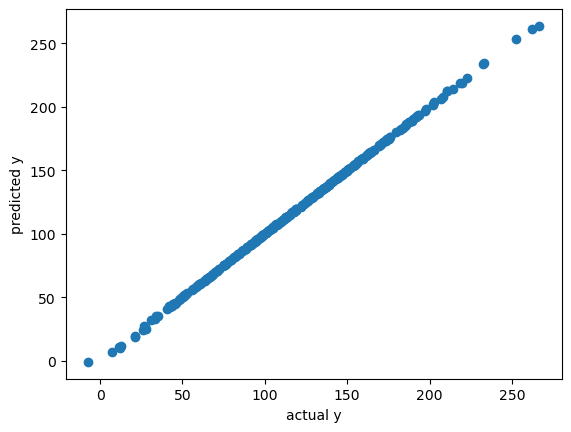

In [5]:
# Cell 4 - Fit initial mlpregressor model

# fit mlpregressor model

# Initialize the MLPRegressor with desired parameters
mlp = MLPRegressor(hidden_layer_sizes=(8,), max_iter=100000, random_state=42, activation='logistic',solver='sgd')

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The neural network trained for %d epochs"%(mlp.n_iter_))
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create the plot
plt.scatter(y_test, y_pred)
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()

In [6]:
# Cell 6 - Randomized SearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 5)],  # Different hidden layer configurations
    'activation': ['relu', 'tanh','logistic'],  # Activation functions to test
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],  # Learning rate strategies
    'max_iter': [5000, 10000]  # Maximum number of iterations
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=42,n_jobs=-1)

# Perform the randomized search on the training data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best hyperparameters found:")
print(random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters found:
{'solver': 'adam', 'max_iter': 10000, 'learning_rate': 'constant', 'hidden_layer_sizes': (10,), 'alpha': 0.001, 'activation': 'relu'}


In [7]:
# Cell 7 GridSearchCV


# Initialize the MLPRegressor model
mlp = MLPRegressor(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2,n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best hyperparameters found:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")



Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best hyperparameters found:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (5, 5), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'adam'}
Test MSE: 0.004056005184849552
